In [3]:
!pip install --user missingno

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import zscore as zscore

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
Source for ref: https://github.com/srgarcess/BCG/blob/main/task2/EDA_Cleaning_BCG.ipynb

In [4]:
# Read in dataset
link1 = 'C://Users//vijayant.mehla//Downloads/ml_case_training_data.csv'
link2 = 'C://Users//vijayant.mehla//Downloads/ml_case_training_hist_data.csv'
link3 = 'C://Users//vijayant.mehla//Downloads//ml_case_training_output.csv'

# list all dates in a list
dt_lst = ['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']

# data importing          
pco_main = pd.read_csv(link1, parse_dates=dt_lst)#, index_col= 'date_activ')
#parse_dates is used to specify explicitly which column is date.
#https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e
pco_hist = pd.read_csv(link2, parse_dates=['price_date']) # Yearly history of consumption per user
pco_output = pd.read_csv(link3)
pd.set_option('display.max_columns',None)

In [5]:
##Data Exploration
From the output dataset we can derive a quick insight on customer retention.

SyntaxError: invalid syntax (<ipython-input-5-2dd7062d6835>, line 2)

In [ ]:
#For better readability,
# Replace the churn column with appropiate labels
pco_output['churn'] = pco_output['churn'].replace({0:'Stayed',1:'Churned'})

# Glimpse
pco_output.head()

In [ ]:
# What number of customers have churned in the last 3 months?
attrition_count = pco_output['churn'].value_counts()  #value_counts() in python is like group_by of R
print('Total Number of Churned Customers:\n', attrition_count) # \n is for next line

In [ ]:
#See, so value_count() is like group_by in Python
pco_output.shape[0]

In [ ]:
# What is the proportion of customer attrition in the last 3 months?
attrition_rate = pco_output['churn'].value_counts() / pco_output.shape[0] * 100
print('Attrition rate: \n', attrition_rate)

In [ ]:
#So, df.shape() gives its number of rows etc, and [0] gives
#df.ndim() gives dimension - 1D, 2D
#shape-rows and columns and shape[0] = no of rows, shape[1] = no of columns
#size- total no of elements are similar, rows*columns

In [ ]:
#Our learnings yet:
In the last 3 months 1,595 customers have churned
There are currently 14,501 active clients
Total clients over last 3 months - 16096
Customer retention is 90% in the last 3 months
Customer attrition is 10% in the last 3 months

In [ ]:
#pco_hist contains the history dataset
This dataset contains 1-year historical data for each client. It provides insights of the yearly activity of each client.

In [7]:
# Display the yearly consumption of energy and power of customers
pco_hist.head()


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
# Examing the structure of the dataframe
pco_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
id              193002 non-null object
price_date      193002 non-null datetime64[ns]
price_p1_var    191643 non-null float64
price_p2_var    191643 non-null float64
price_p3_var    191643 non-null float64
price_p1_fix    191643 non-null float64
price_p2_fix    191643 non-null float64
price_p3_fix    191643 non-null float64
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [8]:
# Examine the descriptive statistics of the dataframe
#So easy, for descriptive stats no mean, max, simply do the df.describe()
pco_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [9]:
# Identify the nullity of the dataframe
missing_values_hist = pco_hist.isna().sum()
print('Total Missing Values:\n', missing_values_hist)
#Question is how to get total nulls in value. Remember, these are only nulls in these specific columns.

Total Missing Values:
 id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64


In [12]:
# Identify the percentage of nullity in the dataframe for each collumn
missing_values_hist_perc = pco_hist.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc)
#Notice how null, na both work

Percentage of Missing Values:
 id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64


In [ ]:

Facts
The average price of energy for the 1st period was: $0.14
The average price of energy for the 2nd period was: $0.05
The average price of energy for the 3rd period was: $0.03
The average price of energy was declining in the last year.

The average power of power for the 1st period was: $43.32
The average power of power for the 2nd period was: $10.69
The average power of power for the 3rd period was: $6.45
The average price of power was declining in the last year.

In [ ]:

Observations
The columns price_p1_fix, price_p2_fix, and price_p3_fix contain negative values. These negative prices of power do not make sense.

The dataset pco_hist contains 1359 rows displaying NaN values on 6 variables except for id and price_date.

The price_..._var and price_..._fix columns are missing 0.704% of the data in each of them.

Note: Pandas recognizes these NaN values and removes them when displaying descriptives statistics.

Notice how the price of energy has a minimum value of zero. Perhaps some customers churned thereby making the consumption of energy zero.

In [ ]:
The Main Dataset
This dataset contain more characteristics about each client's account and activity.

In [13]:
# Print header
pco_main.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,NaT,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [14]:
# printo info
pco_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
id                          16096 non-null object
activity_new                6551 non-null object
campaign_disc_ele           0 non-null float64
channel_sales               11878 non-null object
cons_12m                    16096 non-null int64
cons_gas_12m                16096 non-null int64
cons_last_month             16096 non-null int64
date_activ                  16096 non-null datetime64[ns]
date_end                    16094 non-null datetime64[ns]
date_first_activ            3508 non-null datetime64[ns]
date_modif_prod             15939 non-null datetime64[ns]
date_renewal                16056 non-null datetime64[ns]
forecast_base_bill_ele      3508 non-null float64
forecast_base_bill_year     3508 non-null float64
forecast_bill_12m           3508 non-null float64
forecast_cons               3508 non-null float64
forecast_cons_12m           16096 non-null float64
forecast

In [15]:
# Examine the descriptive statistics of the main dataset
pco_main.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [ ]:
Learnings
The average tenure of a client is 5 years
The average net marging is $217

In [ ]:
Observations
The 14 columns contain negative minimum values

The activity_new column is missing 59.3% of its data (6551non-null/16096total)

The campaign_disc_ele column is missing completely
The channel_sales column is missing 26.2% of its data
The date_end column is missing 0.01% of its data
The date_first_activ_ column is missing 78.2% of its data
The date_modif_prod column is missing 0.9% of its data
The date_renewal column is missing 0.24% of it data
The marging_gross_pow_ele and margin_net_pow_ele columns are both missing 0.08% of its data
The net_margin column is missing 0.09% of its data
The origin_up column is missing 0.54% of its data
The pow_max column is missing 0.018% of its data
The forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m, and forecast_cons columns are each missing 78.2% of its data

In [ ]:
Dealing with missing data

1. Let us first convert missing values to null values
2. Analyze how many number or type of missingness is in data
3. Delete/Input missing values
4. Evaluate and compare the performance with this new imputed dataset

In [ ]:
The missingno (imported as msno) package is great for visualizing missing data - we will be using:

msno.matrix() visualizes a missingness matrix
msno.bar() visualizes a missingness barplot
plt.show() to show the plot

In [ ]:
#Considerations
Is the data missing at random?
Types of missingness

Missing Completely at Random (MCAR)
Missingness has no relationship between any values, observed or missing

Missing at Random (MAR)
There is a systematic relationship between missingness and other observed data, but not the missing data

Missing Not at Random (MNAR)
There is a relationship between missingness and its values, missing or non-missing

In [ ]:
When and how to delete missing data?
Types of deletions

Pairwise deletion
Pandas skips NaN which is equivalent to pairwise deletion. Pairwise deletions minimize the amount of data loss and are hence preferred. However, it is also true that at several instances they might negatively affect our analysis.

Listwise deletion
In listwise deletion the incomplete row is deleted, also called complete case analysis. The major disadvantage of listwise deletions is amount of data lost. Example: df.dropna(subset=['column'], how='any',inplace=True)

Note: Both of these deletions are used only when the values are missing completely at random that is MCAR

In [16]:
# Identify negative columns
negative_cols = ['price_p1_fix','price_p2_fix','price_p3_fix']

# Convert to positive the negative columns in pco_hist
pco_hist[negative_cols] = pco_hist[negative_cols].apply(abs) #df[col] becomes = df[col].apply(absolute)

pco_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325563,10.698210,6.455443
std,0.025117,0.050033,0.036335,5.437816,12.856039,7.782273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


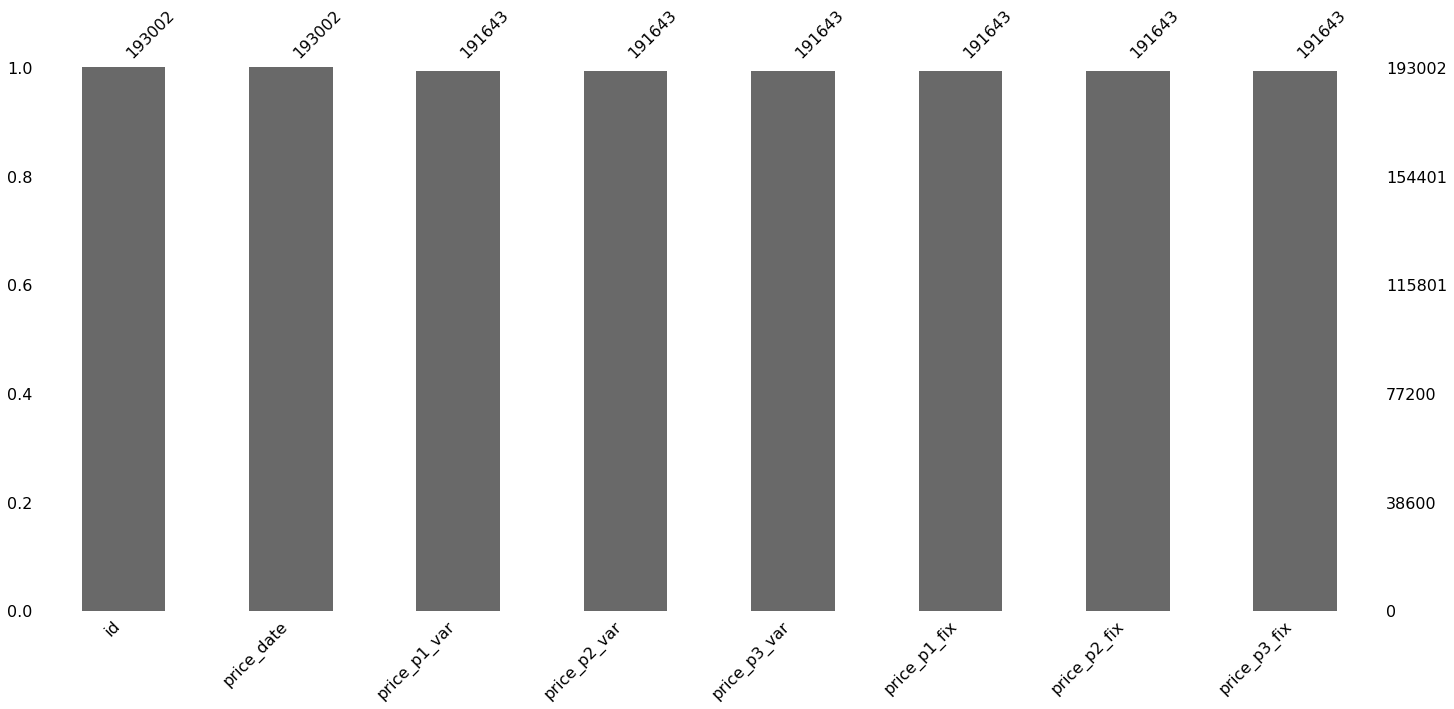

In [22]:
# Visualize the completeness of the dataframe
msno.bar(pco_hist)
pco_hist.head()

In [ ]:
To the untrained eye, it might seem that there is no data missing.
However, we estimated that 0.7% of the data in the price columns are missing. We can notice that the value counts at the top of each columns display a different amount.

In [27]:
pco_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
id              193002 non-null object
price_date      193002 non-null datetime64[ns]
price_p1_var    191643 non-null float64
price_p2_var    191643 non-null float64
price_p3_var    191643 non-null float64
price_p1_fix    191643 non-null float64
price_p2_fix    191643 non-null float64
price_p3_fix    191643 non-null float64
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


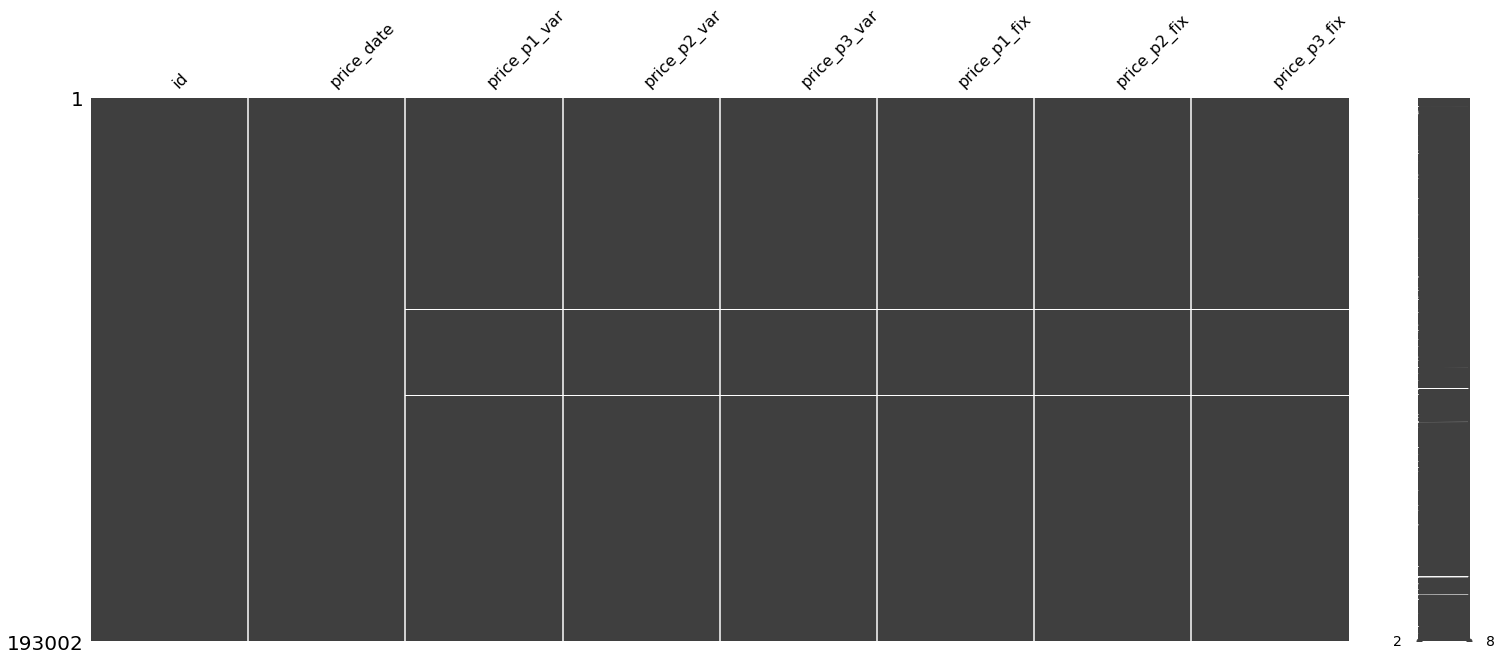

In [28]:
# Visualize the locations of the missing values of the dataset
sorted = pco_hist.sort_values(by = ['id','price_date'])
msno.matrix(sorted)

In [ ]:
he nullity matrix describes the nullity of the dataset and appears blank wherever there are missing values.

The column on the very right summarizes the general shape of the data completeness and points out the row. Total count of columns at the bottom right.
So rows at left, null and complete columns at right bottom.

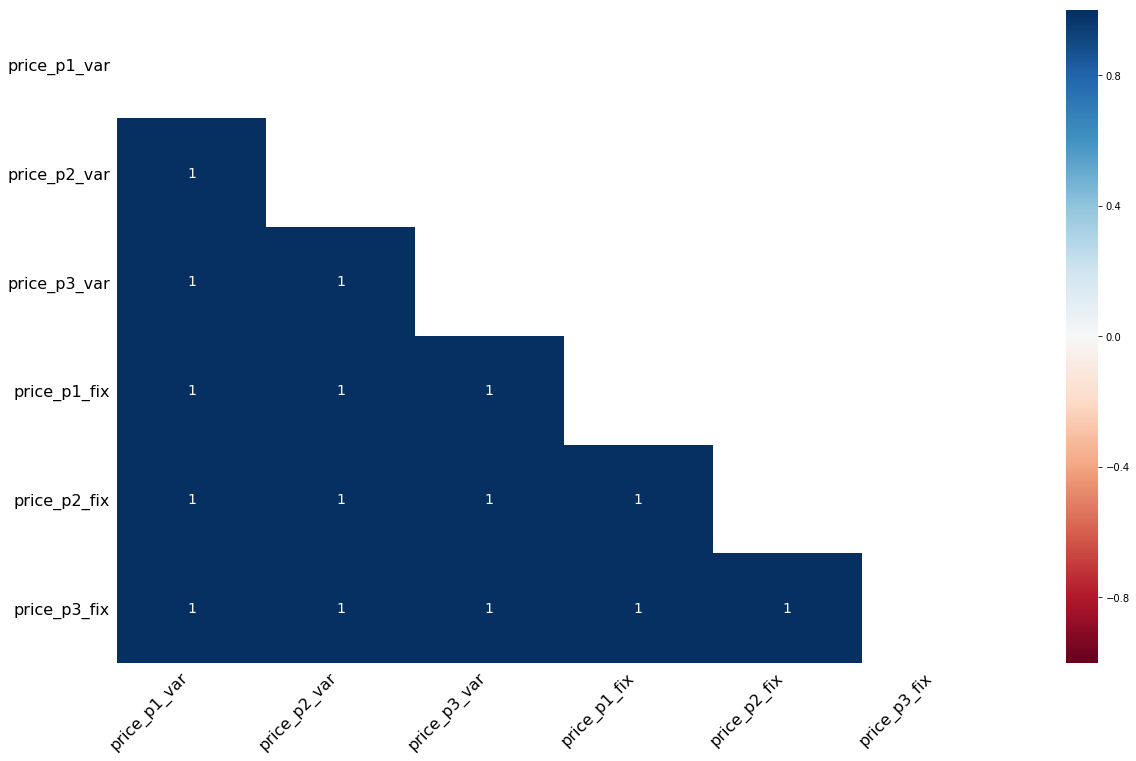

In [29]:
# Visualize the correlation between the numeric variables of the dataframe
msno.heatmap(pco_hist)

In [30]:
#Seem highly correlated

# Identify the index of the IDs containing missing values.
hist_NAN_index = pco_hist[pco_hist.isnull().any(axis=1)].index.values.tolist()

# Obtain a dataframe with the missing values
pco_hist_missing = pco_hist.iloc[hist_NAN_index,:]

# Glimpse at the NaN cases of the pco_hist dataset
pco_hist_missing.head(10)

#Sequence:
#1. df[df['A'].isnull()].index.tolist()
#2. df.loc["element"] - returns row of name/element
#3. df.loc[ ["r"]["c"] ] we get rows with r elements and columns are mentioned in 2nd one []
#Its called indexing
#4. df.loc[[:], [c]] - all rows, col - column
#5. iloc is same, just that indexes are passed in iloc, and in .loc - names are passed

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
471,33bb3af90650ac2e9ecac6ff2c975a6b,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
472,33bb3af90650ac2e9ecac6ff2c975a6b,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
475,33bb3af90650ac2e9ecac6ff2c975a6b,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
476,33bb3af90650ac2e9ecac6ff2c975a6b,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN
874,0e90101b08183cc9548e827e4b256f47,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# extract the unique dates of missing data
date_lst = pco_hist_missing['price_date'].unique()
id_lst = pco_hist_missing['id'].unique()

# Create a time dataframe with the unique dates
time_df = pd.DataFrame(data=date_lst, columns=['price_date'] )

# Glimpse the time dataframe
time_df.sort_values(by=['price_date'])

,price_date
9,2015-01-01
11,2015-02-01
8,2015-03-01
0,2015-04-01
2,2015-05-01
1,2015-06-01
10,2015-07-01
3,2015-08-01
4,2015-09-01
7,2015-10-01


In [ ]:

#Facts
There is high correlation between the missingness in the numeric columns and is values, missing or non-missing
There are 1359 clients who are missing price data at least in 1 month
#Observations
After sorting the pco_hist dataset by id and price_date, we found that some columns are likely to be MNAR.
The columns containing prices display strong positive correlation in the missingness suggests a case of MNAR.
This event suggest that multicolinearity might be present in the dataset.

#Imputations
Imputing time-series data requires a specialized treatment. Time-series data usually comes with special characteristics such trend, seasonality and cyclicality of which we can exploit when imputing missing values in the data.

In this particular dataset, there's not such thing as seasonality because it only has monthly data for one year.

In [32]:
#Filling timeseries data
# Make a copy of pco_hist dataset
pco_hist_ff = pco_hist.copy(deep=True)

# Print prior to imputing missing values
print(pco_hist_ff.iloc[hist_NAN_index,3:9].head())

# Fill NaNs using forward fill
pco_hist_ff.fillna(method = 'ffill', inplace=True)

print(pco_hist_ff.iloc[hist_NAN_index,3:9].head())

     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75            NaN           NaN           NaN           NaN           NaN
221           NaN           NaN           NaN           NaN           NaN
377           NaN           NaN           NaN           NaN           NaN
413           NaN           NaN           NaN           NaN           NaN
461           NaN           NaN           NaN           NaN           NaN
     price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix
75       0.000000      0.000000     44.266931      0.000000      0.000000
221      0.000000      0.000000     44.266931      0.000000      0.000000
377      0.087970      0.000000     44.266931      0.000000      0.000000
413      0.102239      0.070381     40.565969     24.339581     16.226389
461      0.000000      0.000000     44.266931      0.000000      0.000000


In [33]:
pco_hist_ff.describe()


,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141006,0.054376,0.030689,43.326213,10.689406,6.450494
std,0.025091,0.050040,0.036333,5.431161,12.853850,7.781323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085450,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [34]:
# Merge output dataset with historical forward fill dataset
pco_hist_ff_merged = pco_hist_ff.merge(right=pco_output,on=['id'])
pco_hist_ff_merged.head()


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0


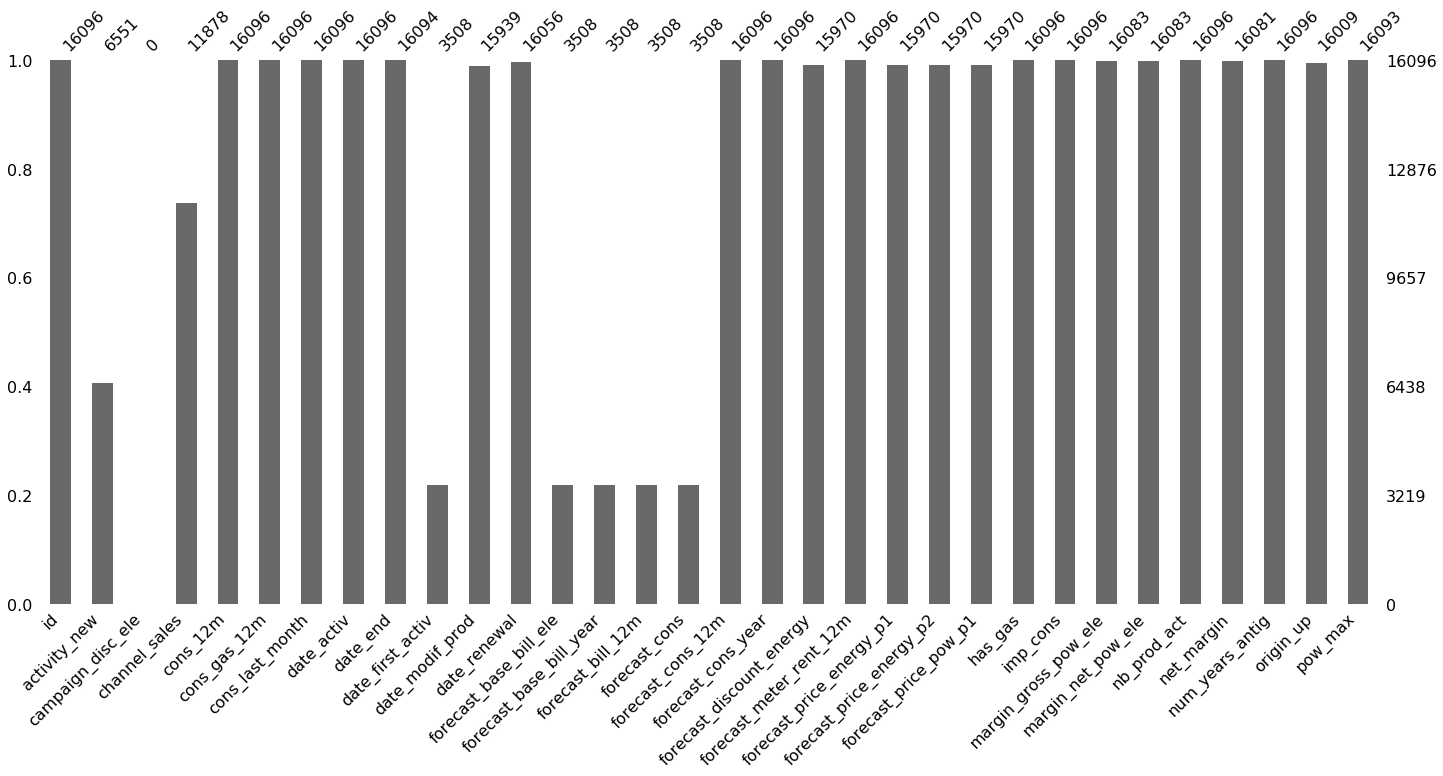

In [35]:
#Tackling the main dataset


# Visualize the completeness of the dataframe
msno.bar(pco_main)

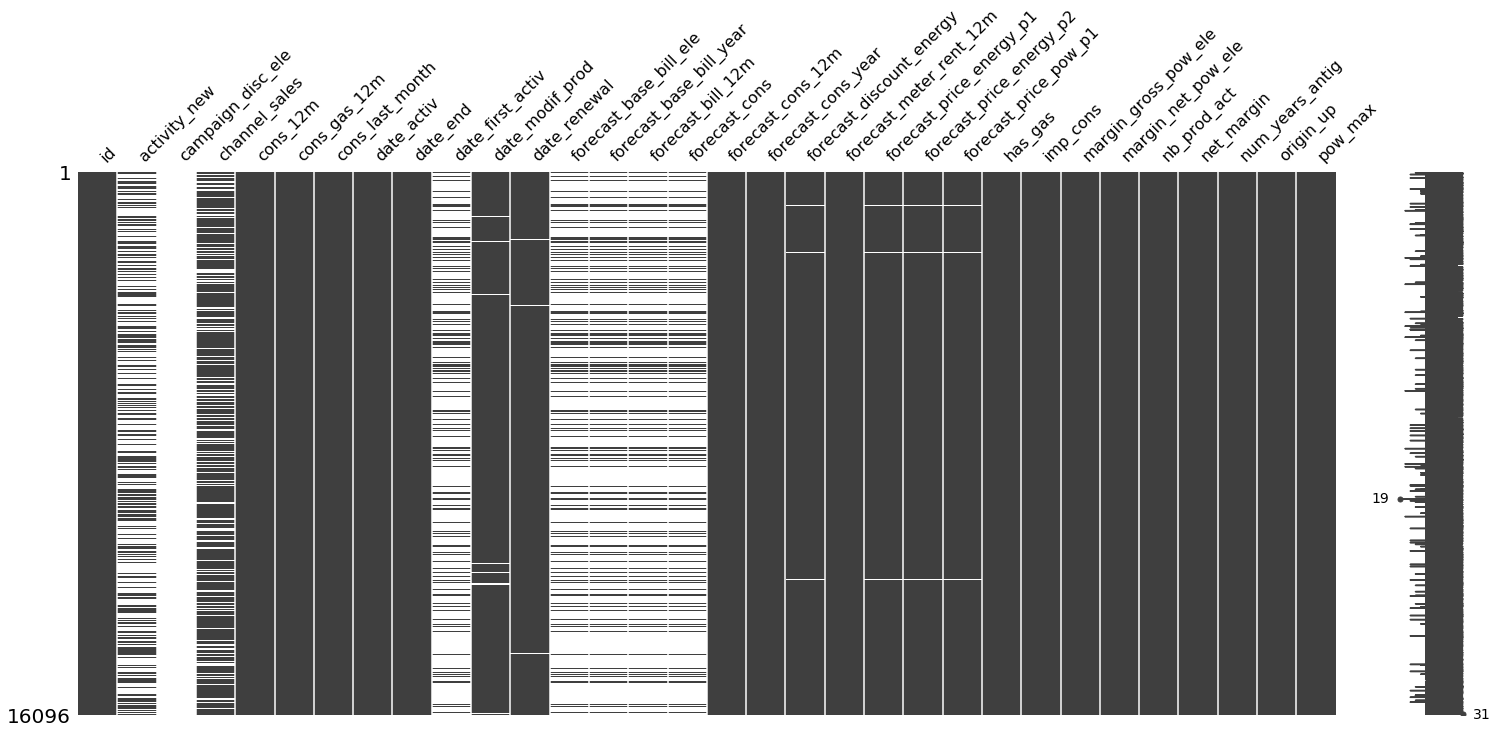

In [36]:

# Visualize the locations of the missing values of the dataset
msno.matrix(pco_main)

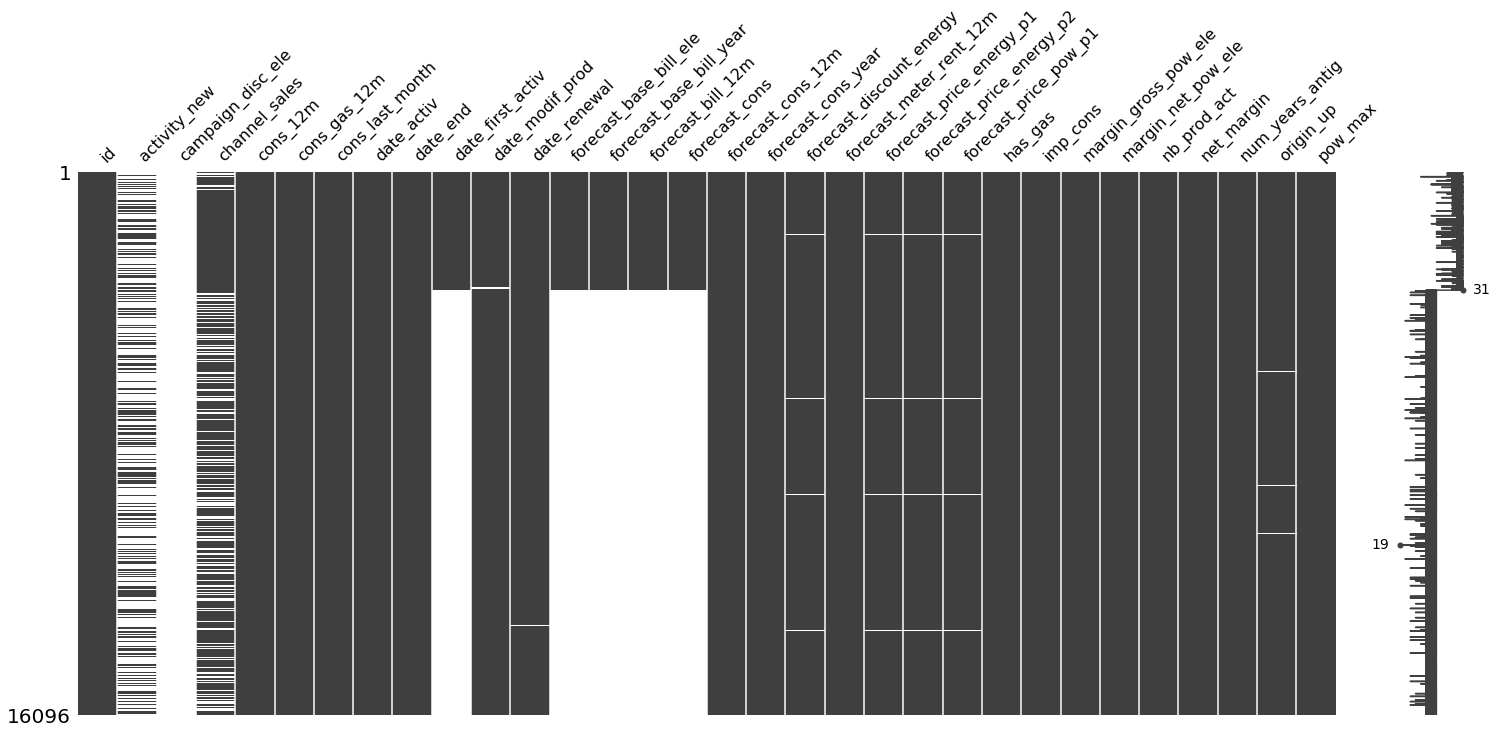

In [37]:
sorted_main = pco_main.sort_values('date_first_activ')
msno.matrix(sorted_main)

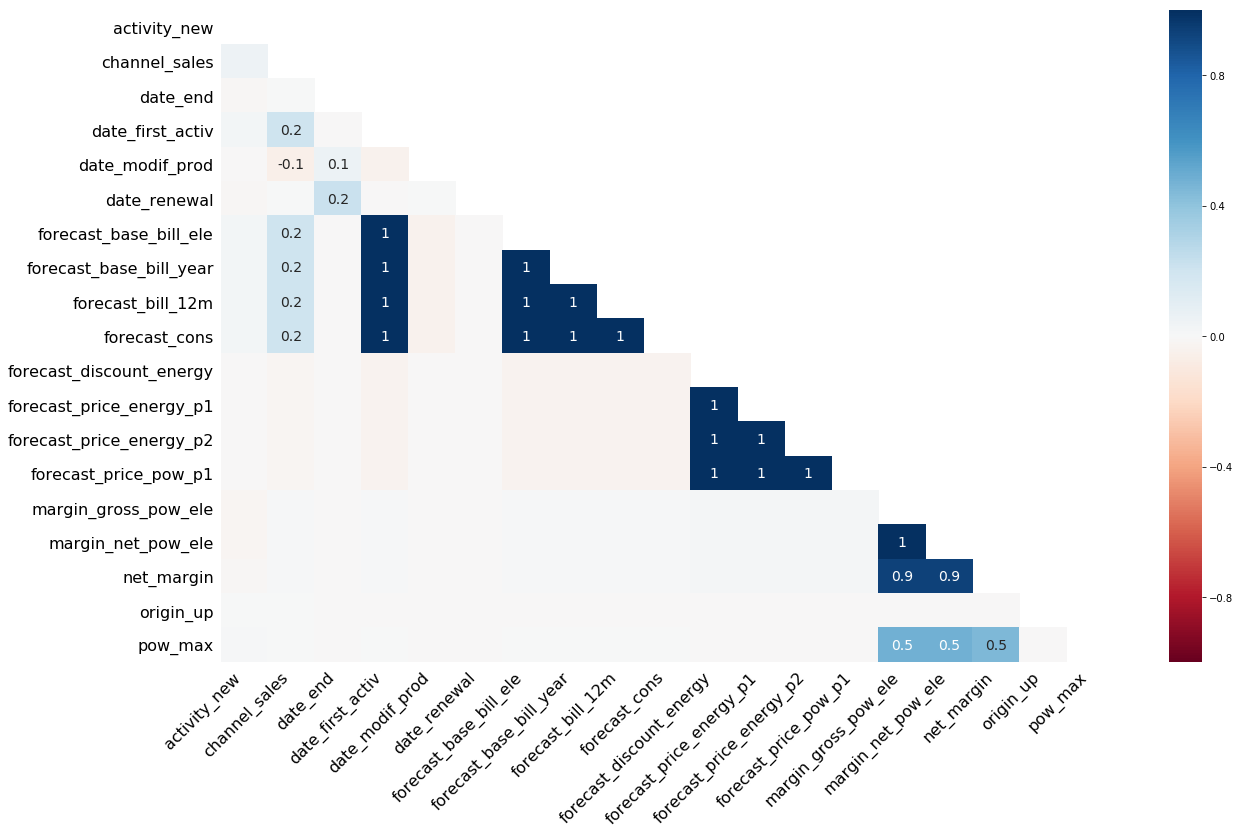

In [38]:
msno.heatmap(pco_main)

In [40]:
# Demonstrate why the date_activ column cannot replace completely date_first_activ
activity = ['date_activ','date_first_activ']

# Filter the columns of interest
pco_activity = pco_main[activity]

# Obtain only the complete cases
pco_activity_cc = pco_activity.dropna(subset=['date_first_activ'],how='any',inplace=False)

# Test whether two objects contain the same elements.
pco_activity_cc.date_activ.equals(pco_activity_cc.date_first_activ)

# Describe it
pco_activity_cc.describe()

,date_activ,date_first_activ
count,3508,3508
unique,1097,1133
top,2012-02-01 00:00:00,2009-07-14 00:00:00
freq,31,34
first,2003-09-23 00:00:00,2001-01-10 00:00:00
last,2014-09-01 00:00:00,2014-09-01 00:00:00


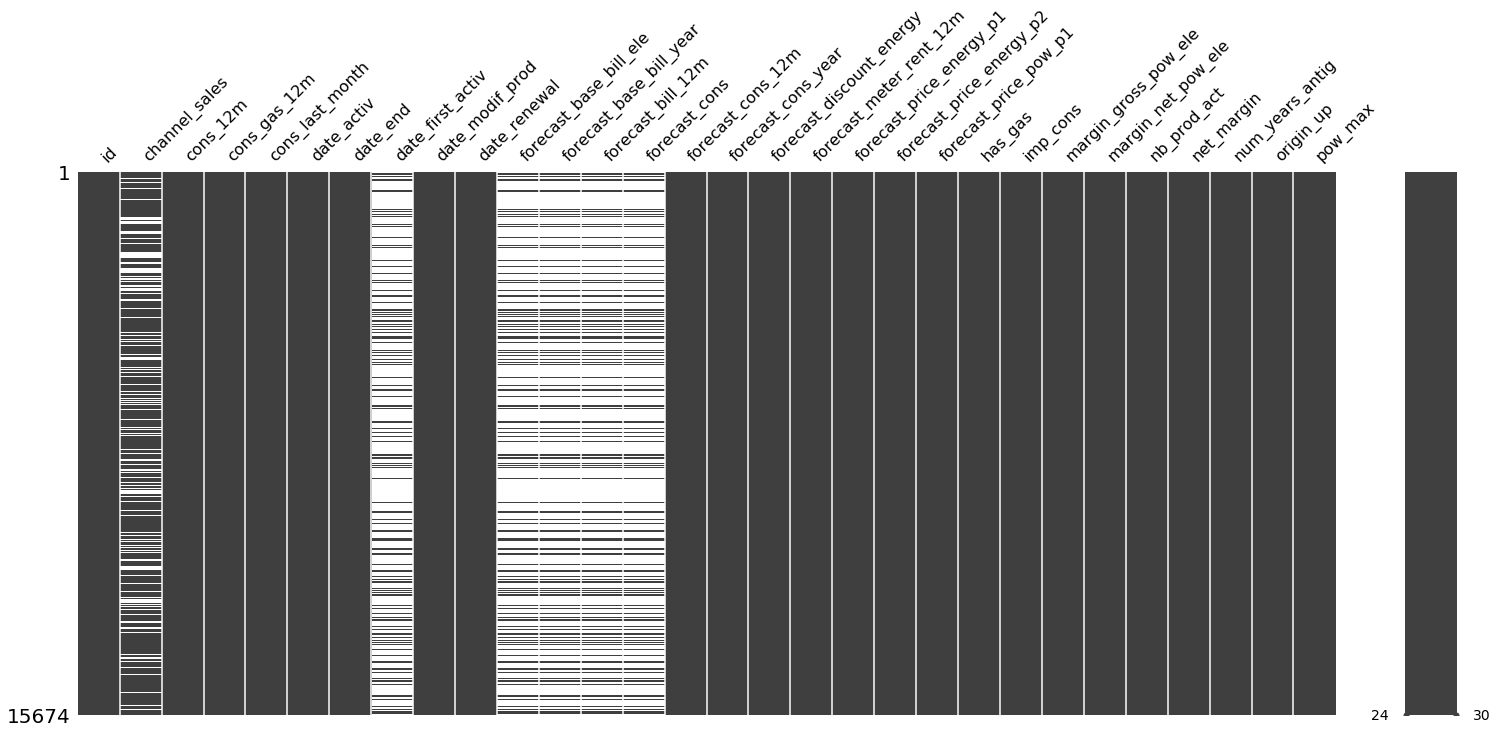

In [41]:
# Drop the column activity_new and campaign_disc_elec
pco_main_drop = pco_main.drop(labels= ['activity_new','campaign_disc_ele'] , axis=1)

# Remove na from date_end date_modif_prod date_renewal origin_up pow_max margin_gross_pow_ele margin_net_pow_ele net_margin
brush = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
         'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1']
pco_main_drop.dropna(subset=brush, how='any',inplace=True)

msno.matrix(pco_main_drop)

In [ ]:
Observations
From describe were completely empty
The variable activity_new is MCAR and has very low correlation with any of the variables. We can safely drop this column.
The variable campaign_disc_elec is completely missing at random on all rows. We can get rid of this column. This suggests that subscribers are not subscribing through campaings offers.
From equality check above
The variable date_first_activ cannot be replace by the values of the date_activ variable. MAR
From heatmap
net_margin is showing strong correlation between margin_gross_pow_elec and margin_net_pow_ele. Multicolinearity is likely here.
The variables origin_up and pow_max display no correlation with any variable and contain 0.54% and 0.01% of missingness respectively. These are MCAR and can be dropped listwise.
Forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m and forecast_cons variables are highly correlated with the date_first_activ variable's missingness. 
Accouting for 78% of missing values in the formerly mention columns and therfore are MNAR. 
*Cannot replace the date_first_activ column with the date_activ column since in some of the cases the dates are not identical.

In [42]:
# Choose the columns without missing values
incomplete_cols = ['channel_sales','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons']

complete_cols = [column_name for column_name in pco_main_drop.columns if column_name not in incomplete_cols]

pco_main_cc = pco_main_drop[complete_cols]

# Fix negative numeric variables
numeric = [column_name for column_name in pco_main_cc.columns
           if pco_main_cc[column_name].dtype == 'float64' 
           or pco_main_cc[column_name].dtype == 'int64']

# Overwrite positive values on negative values
pco_main_cc[numeric] = pco_main_cc[numeric].apply(abs)

# Describe
pco_main_cc.describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.916143e+05,3.132400e+04,1.941588e+04,2359.676441,1911.698354,0.976139,70.210965,0.135925,0.052858,43.522191,196.641669,23.556272,24.125235,1.348092,221.259158,5.052188,20.438270
std,6.724688e+05,1.716291e+05,8.226881e+04,3979.605687,5224.813531,5.124103,78.560454,0.026282,0.048638,5.221651,490.956048,22.456277,25.599218,1.475092,362.053657,1.670284,21.164053
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.893250e+03,0.000000e+00,0.000000e+00,514.045000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.360000,12.360000,1.000000,52.802500,4.000000,12.500000
50%,1.522000e+04,0.000000e+00,9.090000e+02,1178.970000,382.000000,0.000000,19.430000,0.142881,0.086163,44.311378,44.870000,21.090000,21.090000,1.000000,120.545000,5.000000,13.856000
75%,4.953825e+04,0.000000e+00,4.131500e+03,2677.220000,1994.750000,0.000000,131.500000,0.146348,0.098837,44.311378,217.962500,29.640000,29.760000,1.000000,275.797500,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,525.540000,615.660000,32.000000,24570.650000,16.000000,500.000000


In [43]:
# Convert the has_gas column to  Yes/No
pco_main_cc['has_gas'] = pco_main_cc['has_gas'].replace({'t':'Yes','f':'No'})

# Merge the main dataset with the output dataset
pco_main_cc_merged = pco_main_cc.merge(right=pco_output,on=['id'])

# Convert the churn column to Churned/Stayed
pco_main_cc_merged['churn'] = pco_main_cc_merged['churn'].replace({1:'Churned',0:'Stayed'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
# Obtain all the variables except for id
variables = [column_name for column_name in pco_main_cc_merged.columns if column_name != 'id']

# Obtain all the categorical variables except for id
categorical = [column_name for column_name in variables if pco_main_cc_merged[column_name].dtype == 'object']

# Obtain all the Date Variables
dates = [column_name for column_name in variables if pco_main_cc_merged[column_name].dtype == 'datetime64[ns]']

# Obtain all the numeric columns
numeric = [column_name for column_name in variables
           if column_name not in categorical 
           and column_name != 'id'
           and column_name != 'churn'
           and column_name not in dates]

In [ ]:
Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


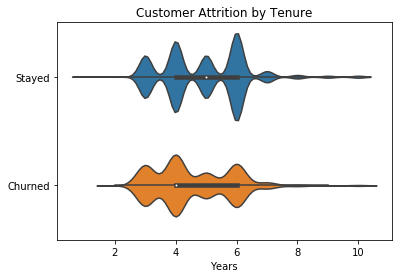

In [46]:
# Calculate the zcores of tenure
tenure_zcores = zscore(a=pco_main_cc_merged['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
abs_tenure_zscores
# Extract Columns of interest
churn_tenure = pco_main_cc_merged[['churn','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( y=churned_tenure_filtered["churn"], x=churned_tenure_filtered["num_years_antig"] )
# Settings
vio.set(xlabel='Years', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

In [ ]:
Facts
The median age of churners is 4 years
Customers are more likely to churn during the 4th year than the 7th year
The median age of retained customers is 5 years

In [58]:
# Most popular electricty campaign
ele_nm = pco_main_cc_merged.loc[(pco_main_cc_merged['churn']=='Stayed') & (pco_main_cc_merged['net_margin']>0),['id', 'origin_up','net_margin']]

#we get location of all those elements
#Ref
#a = df.loc[(df['col'] == 'cond') & (df['col'] = 'cond'), ['col', 'col1', 'col2']]

#ele_nm.value_counts(subset=['origin_up'])
#Ref
#df.value_counts('col')
ele_nm['origin_up'].value_counts
#df['colA'].value_counts()

<bound method IndexOpsMixin.value_counts of 0        ldkssxwpmemidmecebumciepifcamkci
1        kamkkxfxxuwbdslkwifmmcsiusiuosws
2        kamkkxfxxuwbdslkwifmmcsiusiuosws
3        kamkkxfxxuwbdslkwifmmcsiusiuosws
4        lxidpiddsbxsbosboudacockeimpuepw
5        kamkkxfxxuwbdslkwifmmcsiusiuosws
8        lxidpiddsbxsbosboudacockeimpuepw
9        kamkkxfxxuwbdslkwifmmcsiusiuosws
10       lxidpiddsbxsbosboudacockeimpuepw
11       kamkkxfxxuwbdslkwifmmcsiusiuosws
12       kamkkxfxxuwbdslkwifmmcsiusiuosws
13       lxidpiddsbxsbosboudacockeimpuepw
14       ldkssxwpmemidmecebumciepifcamkci
15       ldkssxwpmemidmecebumciepifcamkci
16       kamkkxfxxuwbdslkwifmmcsiusiuosws
17       ldkssxwpmemidmecebumciepifcamkci
18       lxidpiddsbxsbosboudacockeimpuepw
19       ldkssxwpmemidmecebumciepifcamkci
20       lxidpiddsbxsbosboudacockeimpuepw
21       kamkkxfxxuwbdslkwifmmcsiusiuosws
22       lxidpiddsbxsbosboudacockeimpuepw
23       lxidpiddsbxsbosboudacockeimpuepw
24       kamkkxfxxuwbdslkwifmmcs

In [ ]:
#print (df.groupby('colA').count())
#      colB  colC  colD
#colA                  
#a        1     1     1
#b        3     2     2
#c        2     2     1

#print (df.groupby('colA')['colA'].count())
#colA
#a    1
#b    3
#c    2

In [59]:
# Highest netting electricity subscription campaign
print(ele_nm.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1541159.95
ldkssxwpmemidmecebumciepifcamkci     814230.02
kamkkxfxxuwbdslkwifmmcsiusiuosws     717939.95
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


In [ ]:
#The most popular electricity campaign is lxidpiddsbxsbosboudacockeimpuepw which has brought 6,584 current customers.
#The electricity campaign attributable to the highest total net margin is lxidpiddsbxsbosboudacockeimpuepw. Netting $1,541,159.95 in 201

In [60]:

# Select current customers with positive net margins
top_customers = pco_main_cc_merged.loc[(pco_main_cc_merged['churn']=='Stayed') & (pco_main_cc_merged['net_margin']>0),['id','num_years_antig','net_margin']]

# Top 10 customers by net margin
top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

,id,num_years_antig,net_margin
11502,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
6930,78bd1c5c0c67f2be6de89b19df5f8861,3,5625.14
13259,818b8bca0a9d7668252d46b978169325,4,4346.37
8378,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
324,89b3406c3ba717f1b788ceeb5af9e8b9,3,4161.74
10100,93435ecb05910c7b87e0ae9dbedb2882,4,4148.99
12028,4519e6a8928a015819466fc9de0fa49e,3,4040.60
6405,933527d7a2f669af49075a2380c10ded,4,3744.72
6850,43580ef6cc40fcfd0a9b76eee17a267a,4,3716.78
13553,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65


In [61]:
#These are the most profitable customers FOR PowerCo in terms of net margin. 
#We may observe most of them are within the likely tenure of attrition. Time for a marketing campaign!